# 📌 Exploration using pandas, seaborn, and SQL

This file will use a combination of SQL querying, seaborn, and pandas to gain insights into my new DataFrames. Questions and themes that will be explored throughout this exploration:
- What has been the general trend of solar generation from 2016 - 2020?
- What countries are leading the way in solar generation, and how do their trends compare to the rest of the world?
- How do different regions compare to each other in solar growth? How correlated is growth within a region?
- How do other factors, such as GDP, play into trends of solar growth?
- Create Data Frames that are ideal for Tableau visualizations


Insightful queries will be saved as csv files and exported to Tableau for better visualizations.

In [1]:
# Start with necessary imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Load all of my dataframes from the csvs:
original_solar_df = pd.read_csv('../csv_files/solar_power_by_country.csv')
solar_cleaned_df = pd.read_csv('../csv_files/solar_cleaned.csv')
solar_aggregated_df = pd.read_csv('../csv_files/solar_cleaned_aggregated.csv')

# Confirmed all dataframes loaded successfully:
# original_solar_df.head(3)
# solar_cleaned_df.head(3)
# solar_aggregated_df.head(3)
# print(solar_aggregated_df.info())

### Time series analyses
I'll start with a general picture of the data. How has total solar generation changed over time? I'll look at:
- Total generation over time, by region and by country.
- New generation per year.

/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_75188/2131995479.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])
/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_75188/2131995479.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])
/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_75188/2131995479.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['2017', '2018', '2019', '2020'])
/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_75188/2131995479.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

Total sums per regions:
Total sums per countries:


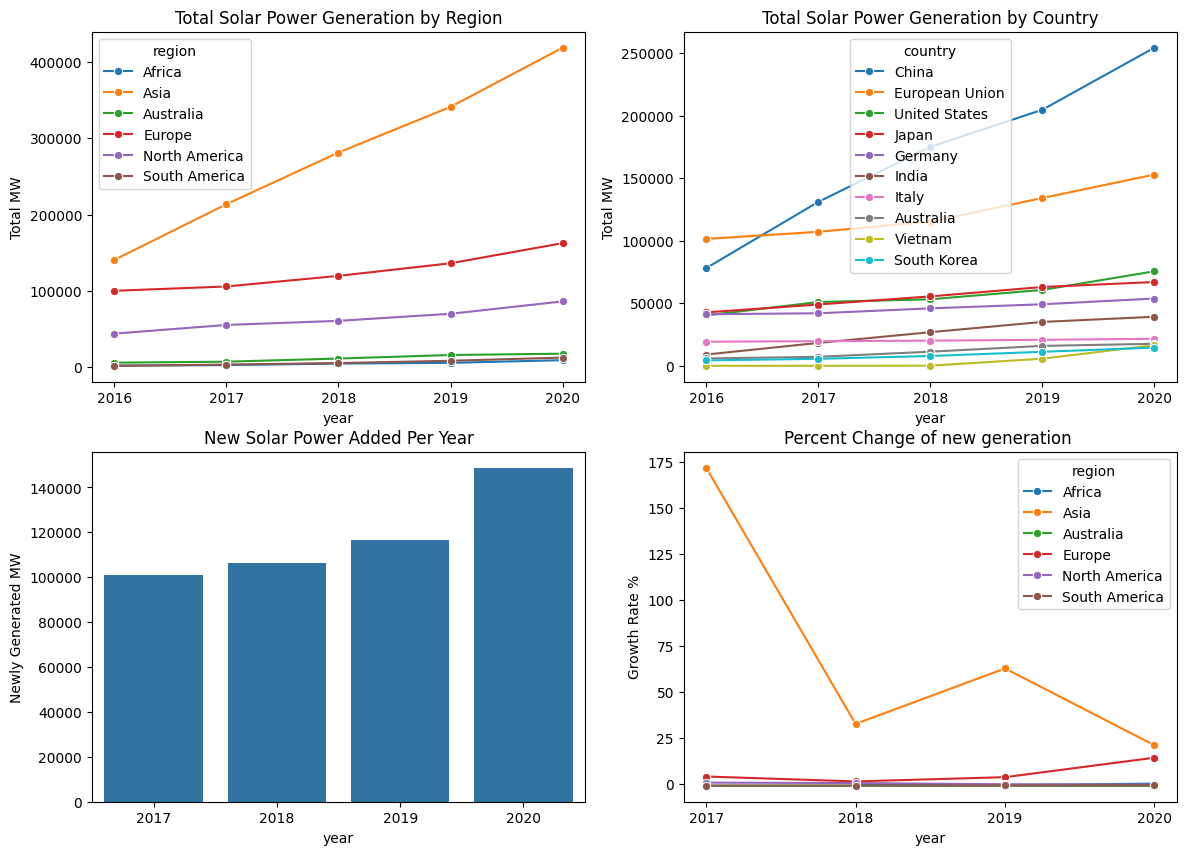

In [2]:
# Making filters to look at total solar generation by region and by country:

# Graph 1
grouped_sums = solar_aggregated_df.groupby('region')[['_2016_total', '_2017_total', '_2018_total',
                                                       '_2019_total', '_2020_total']].sum().reset_index()

# Graph 2
total_country_groups = solar_aggregated_df[['country', '_2016_total', '_2017_total',
                                            '_2018_total', '_2019_total',
                                            '_2020_total' ]].sort_values(by='_2020_total', ascending=False).head(10)

# Graph 3
year_group = solar_aggregated_df[['_2017_new', '_2018_new',
                          '_2019_new', '_2020_new']].sum().reset_index()
year_group.columns = ['year', 'new_generation']

# Graph 4
grouped_sums_new = solar_aggregated_df.groupby('region')[['_2017_new', '_2018_new',
                                                       '_2019_new', '_2020_new']].sum().reset_index()


# Melting the data to make it vertical, in order to plot change over time on linegraphs.
time_series_melt_region = pd.melt(frame=grouped_sums,
                           id_vars=['region'],
                           var_name='year',
                           value_name='total')

time_series_melt_region_new = pd.melt(frame=grouped_sums_new,
                           id_vars=['region'],
                           var_name='year',
                           value_name='total')
time_series_melt_region_new['growth_rate'] = time_series_melt_region_new['total'].pct_change()

time_series_melt_country = pd.melt(frame=total_country_groups,
                           id_vars=['country'],
                           var_name='year',
                           value_name='total')


# Plotting the data
plt.figure(figsize=(14, 10))

ax1 = plt.subplot(2, 2, 1)
sns.lineplot(
    x='year', y='total', data=time_series_melt_region, hue='region', marker='o',
)
ax1.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])
plt.ylabel('Total MW')
plt.title('Total Solar Power Generation by Region')

ax2 = plt.subplot(2, 2, 2)
sns.lineplot(
    x='year', y='total', data=time_series_melt_country, hue='country', marker='o',
)
ax2.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])
plt.ylabel('Total MW')
plt.title('Total Solar Power Generation by Country')

ax3 = plt.subplot(2, 2, 3)
sns.barplot(
    data=year_group,
    x='year',
    y='new_generation'
)
ax3.set_xticklabels(['2017', '2018', '2019', '2020'])
plt.ylabel('Newly Generated MW')
plt.title('New Solar Power Added Per Year')

ax4 = plt.subplot(2, 2, 4)
# change yticks later
sns.lineplot(
    x='year', y='growth_rate', hue='region', data=time_series_melt_region_new, marker='o'
)
ax4.set_xticklabels(['2017', '2018', '2019', '2020'])
plt.ylabel('Growth Rate %')
plt.title('Percent Change of new generation ')


# In table views:
print('Total sums per regions:')
grouped_sums.head(6)
print('Total sums per countries:')
total_country_groups.head(4)

plt.show();

In [3]:
time_series_melt_country.head(10)

,country,year,total
0,China,_2016_total,78070.0
1,European Union,_2016_total,101433.0
2,United States,_2016_total,40300.0
3,Japan,_2016_total,42750.0
4,Germany,_2016_total,41220.0
5,India,_2016_total,9010.0
6,Italy,_2016_total,19279.0
7,Australia,_2016_total,5900.0
8,Vietnam,_2016_total,6.0
9,South Korea,_2016_total,4350.0


There's a lot of information here to dissect. The most obvious observation is that China is leading the world in global solar production. In fact, China alone accounted for more solar production at the end of 2020, than any individually combined continent! Other insights:
- Although Asia's new growth rate declined in 2020, the United States and the EU increased their growth rate, making 2020 the biggest year of new solar production. 
- This shows that even as the growth rate of the global leader might fall, total growth rates are increasing due to China's total production, and the increase of other countries growth rates.


After seeing how Asia – China in particular, outperformes the rest of the world, let's take a closer look at it. I will analyze:
- What years Chinese growth occurred the most in.
- How China compares to the rest of the world in total output: absolutely and as a percentage.
- Which countries are experiencing the most growth as a percentage, and if China ranks among them or not?

In [4]:
# Run some queries to get quick data on china:

conn = sqlite3.connect("../solar.db")

query1 = f"""
SELECT _2017_new, _2018_new, _2019_new, _2020_new
FROM aggregated_solar
WHERE country == 'China'
"""
query2 = f"""
SELECT _2016_total, _2017_total, _2018_total, _2019_total, _2020_total
FROM aggregated_solar
WHERE country == 'China'
"""

china_new_generation_df = pd.read_sql(query1, conn)
china_total_generation_df = pd.read_sql(query2, conn)

conn.close()

In [5]:
# Prepping data for visualizations:

# Graph 1: (china's new growth)
china_new_generation_melted = china_new_generation_df.melt(
    var_name="year",
    value_name="new_solar_generation"
)

# Graph 2: (china's growth compared to rest of the world)
china_total_generation_melted = china_total_generation_df.melt(
    var_name="year",
    value_name="new_solar_generation"
)

# Editing this China specific DataFrame for graph 2:
time_series_melt_region = time_series_melt_region.loc[ time_series_melt_region['region'] != 'Asia'   ]
new_column = ['china', 'china', 'china', 'china', 'china']
china_total_generation_melted['region'] = new_column
china_total_generation_melted = china_total_generation_melted[['region'] + [col for col in china_total_generation_melted.columns if col != 'total']]
china_total_generation_melted = china_total_generation_melted.iloc[:, :-1]
china_data = china_total_generation_melted.rename(columns={'new_solar_generation': 'total'})
continents_and_china = pd.concat([time_series_melt_region, china_data], ignore_index=True)

# Graph 3: (share of global solar power)
total_country_groups = solar_aggregated_df[['country', '_2016_total', '_2017_total',
                                            '_2018_total', '_2019_total',
                                            '_2020_total' ]].sort_values(by='_2020_total', ascending=False)
global_solar_sub_china = time_series_melt_country.loc[
(time_series_melt_country['country'] != 'European Union') & (time_series_melt_country['country'] != 'China')]
china_totals = time_series_melt_country.loc[time_series_melt_country['country'] == 'China']
yearly_global_sub_china = global_solar_sub_china.groupby('year')['total'].sum().reset_index()
yearly_total_for_china = china_totals.groupby('year')['total'].sum().reset_index()

comparison = yearly_global_sub_china.merge(yearly_total_for_china, on='year', suffixes=('_global', '_china'))
comparison['china_share'] = comparison['total_china'] / (comparison['total_china'] + comparison['total_global'])

def fix_year(columns_value):
    parts = columns_value.split('_')
    return int(parts[1])

comparison['year'] = comparison['year'].apply(fix_year)

# Graph 4:
total_country_groups = solar_aggregated_df[['country', '_2016_total', '_2017_total',
                                            '_2018_total', '_2019_total',
                                            '_2020_total' ]]

country_total_melt = pd.melt(frame=total_country_groups,
                           id_vars=['country'],
                           var_name='year',
                           value_name='total')
country_total_melt['year'] = country_total_melt['year'].str.extract('(\d+)').astype(int)
country_total_melt = country_total_melt.sort_values(by=['country', 'year'])
country_total_melt['growth_rate'] = country_total_melt.groupby('country')['total'].pct_change()
country_total_melt = country_total_melt.loc[country_total_melt['year'] != 2016]
top_10_countries = country_total_melt.groupby('country')['growth_rate'].mean().nlargest(10).index
filtered_country_total_melt = country_total_melt[country_total_melt['country'].isin(top_10_countries)]
filtered_country_total_melt = filtered_country_total_melt[filtered_country_total_melt['country'] != 'Vietnam']
# Try to make graphs 2-4 filtered with less lines

/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_75188/3541087054.py:54: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  country_total_melt['growth_rate'] = country_total_melt.groupby('country')['total'].pct_change()


/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_75188/2792434336.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['2017', '2018', '2019', '2020'])
/var/folders/wr/ngy9lj557nl6cpv0nwkv2fkh0000gn/T/ipykernel_75188/2792434336.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])


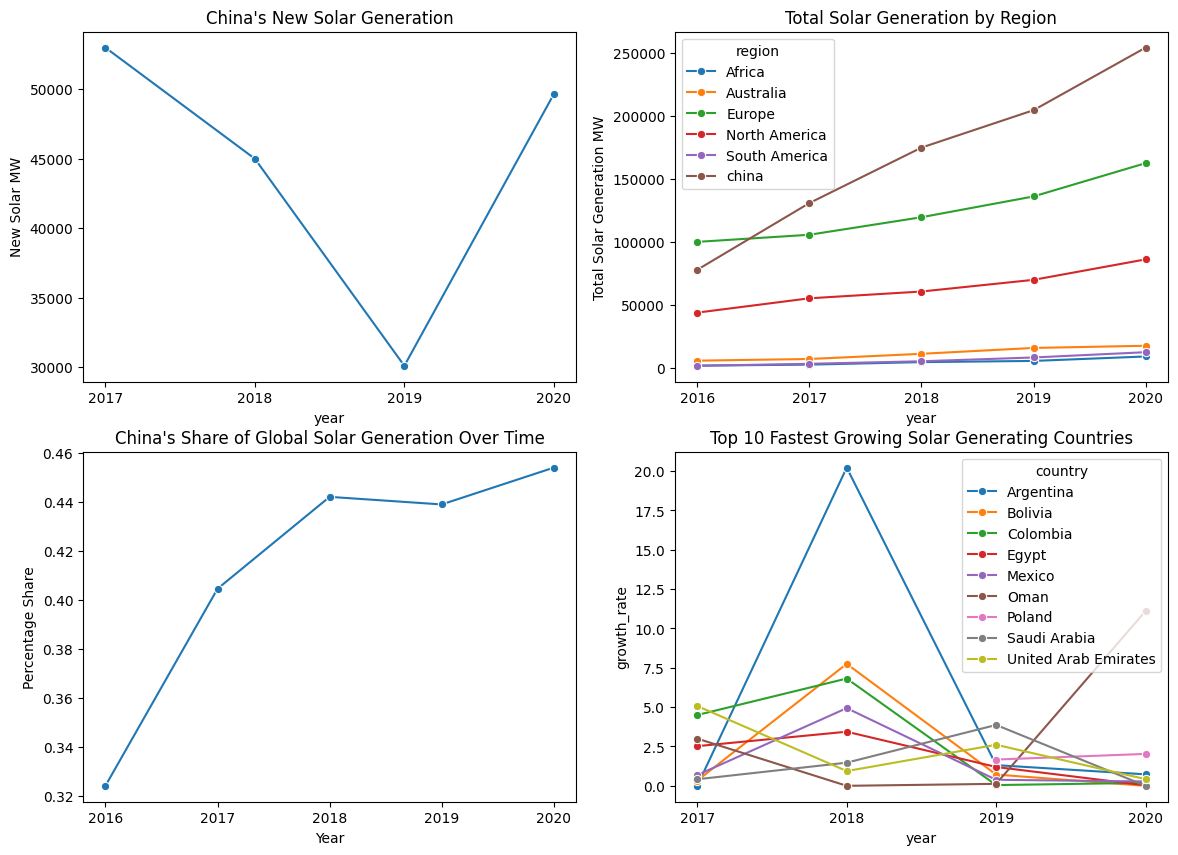

In [6]:
# Visualizing the data about China:

plt.figure(figsize=(14, 10))

ax1 = plt.subplot(2, 2, 1)
sns.lineplot(
    x='year',
    y='new_solar_generation',
    marker='o',
    data=china_new_generation_melted
)
ax1.set_xticklabels(['2017', '2018', '2019', '2020'])
plt.ylabel('New Solar MW')
plt.title("China's New Solar Generation")

ax2 = plt.subplot(2, 2, 2)
sns.lineplot(
    x='year',
    y='total',
    hue='region',
    data=continents_and_china,
    marker = 'o'
)
ax2.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])
plt.ylabel('Total Solar Generation MW')
plt.title("Total Solar Generation by Region")

ax3 = plt.subplot(2, 2, 3)
sns.lineplot(x='year', y='china_share', data=comparison, marker='o')
plt.title("China's Share of Global Solar Generation Over Time")
plt.ylabel("Percentage Share")
plt.xlabel("Year")
ax3.set_xticks([2016, 2017, 2018, 2019, 2020])
ax3.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])

ax4 = plt.subplot( 2, 2, 4)
sns.lineplot(x='year', y='growth_rate', hue='country', data=filtered_country_total_melt, marker='o')
ax4.set_xticks([2017, 2018, 2019, 2020])
ax4.set_xticklabels(['2017', '2018', '2019', '2020'])
plt.title("Top 10 Fastest Growing Solar Generating Countries")

plt.show();

(NOTE: Vietnam and China are excluded from graph 4, to give more readable results).
China really dominated the global solar market for many years – it still does, but it no longer is outpacing the rest of the world at the same pace as it was. Some observations from my graphs: 
- In 2019 China added about 30,000 MW to its grid. That is still vastly more than any other country, but was a sharp decline in its relative growth, and therefore it was the first year that its percentage share of global capicity decreased.
- The fastest growing countries for solar power follow obvious regional trends: 2018 was a big year for South American countries, and a slower year for West Asian countries, and this trend continued to flip each year for the next two years. 


Now it's time to look at what countries and regions produce the most solar power per capita. Questions and insights that will be generated in this section:
- What is the global average watts produced per human?
- What is the distribution of watts per capita per region?
- Consumption/generation analysis: compare country and regional total output vs per capita output. 

In [7]:
# Querying the database for new tables:

conn = sqlite3.connect("../solar.db")

query5 = f"""
SELECT AVG(w_per_capita_2019) AS global_average
FROM aggregated_solar;
"""
query6 = f"""
SELECT region, SUM(w_per_capita_2019) AS watts_per_capita_2019, SUM(share_of_total_consumption) AS percentage_share_consumption
FROM aggregated_solar
GROUP BY region;
"""

wats_global_average = pd.read_sql(query5, conn)
consumption_to_wats_comparison = pd.read_sql(query6, conn)

conn.close()


print(wats_global_average)
# Creating a filter for the next graph:
watts_filter_country = solar_aggregated_df.sort_values(by='w_per_capita_2019', ascending=False).head(10)

   global_average
0      128.816425


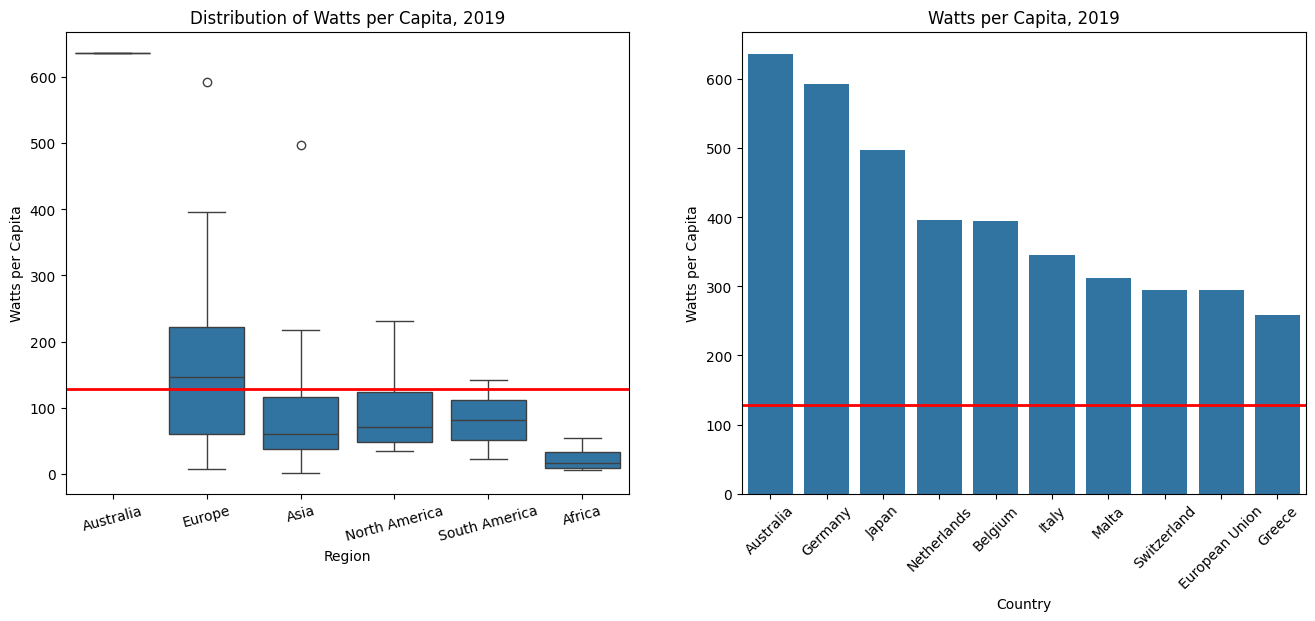

In [8]:
# Plotting the new DataFrames:

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(
    x='region',
    y='w_per_capita_2019',
    data=solar_aggregated_df.sort_values(by='w_per_capita_2019', ascending=False)
)
plt.ylabel("Watts per Capita")
plt.xlabel("Region")
plt.xticks(rotation=15)
plt.axhline(y=128, color='red', linestyle='-', linewidth=2)  # Change color, style, width as needed
plt.title("Distribution of Watts per Capita, 2019")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(
    x='country',
    y='w_per_capita_2019',
    data=watts_filter_country
)
plt.ylabel("Watts per Capita")
plt.xlabel("Country")
plt.axhline(y=128, color='red', linestyle='-', linewidth=2)  # Change color, style, width as needed
plt.xticks(rotation=45)
plt.title("Watts per Capita, 2019")


plt.show();

After graphing watts per capita as a regional distribution and for the top countries, along with the 128 global average, we get a good idea of how each continent ranks against each other, as well as how the top performing countries outperform the rest of the world. Aside from the countries of Austrailia and Japan, Europe vastly outperorms the rest of the world in per-capita solar generation.

Now Let's take a look at how gdp is correlated with solar generation and consumption. Insights and questions that will be explored and considered are:
- What is the correlation between regional gdp and total solar generation?
- What is the correlation between regional gdp and percentage_share_consumption?
- What is the correlation between regional gdp and avg_w_per_capita_2019?
- What is the correlation between regional gdp and the latest data on new solar added?
- In other words, which regions are generating the most solar power relative to their total gdp, and gdp per capita?


In [9]:
# Querying the database to obtain aggregates of production and consumption:

conn = sqlite3.connect("../solar.db")

query7 = f"""
SELECT region, AVG(share_of_total_consumption) AS percentage_share_consumption,
SUM(_2020_total) AS _2020_total, AVG(w_per_capita_2019) AS avg_w_per_capita_2019, AVG(_2020_new) AS avg_2019_new
FROM aggregated_solar
GROUP BY region;
"""
total_consumption_and_2020_total = pd.read_sql(query7, conn)

conn.close()

display(total_consumption_and_2020_total.head(7))

,region,percentage_share_consumption,_2020_total,avg_w_per_capita_2019,avg_2019_new
0,None,6.000000,152917,295.000000,18788.000000
1,Africa,1.650000,9272,23.333333,504.571429
2,Asia,4.223913,418954,92.000000,3382.565217
3,Australia,10.700000,17769,637.000000,862.000000
4,Europe,4.533871,162668,164.709677,850.096774
5,North America,5.050000,86316,101.750000,1803.666667
6,South America,5.400000,12664,82.000000,577.571429


In [10]:
# Hard coding gdp statistics, in order to create ratios of production to gdp:

continent_gdp_per_capita = {
    'Africa': 2409,
    'Asia': 8632,
    'South America': 11242,
    'North America': 64961,
    'Europe': 36751,
    'Australia': 63842
}

continent_gdp_net = {
    'Africa': 2781,
    'Asia': 39781,
    'South America': 4225,
    'North America': 34007,
    'Europe': 27096,
    'Australia': 2097
}

def add_gdp_per_capita(df):
    df['gdp_per_capita'] = df['region'].map(continent_gdp_per_capita)
    return df

def add_gdp_net(df):
        df['gdp_net'] = df['region'].map(continent_gdp_net)
        return df


total_consumption_and_2020_total = add_gdp_per_capita(total_consumption_and_2020_total)
total_consumption_and_2020_total = add_gdp_net(total_consumption_and_2020_total)
display(total_consumption_and_2020_total.head(7))


,region,percentage_share_consumption,_2020_total,avg_w_per_capita_2019,avg_2019_new,gdp_per_capita,gdp_net
0,None,6.000000,152917,295.000000,18788.000000,NaN,NaN
1,Africa,1.650000,9272,23.333333,504.571429,2409.0,2781.0
2,Asia,4.223913,418954,92.000000,3382.565217,8632.0,39781.0
3,Australia,10.700000,17769,637.000000,862.000000,63842.0,2097.0
4,Europe,4.533871,162668,164.709677,850.096774,36751.0,27096.0
5,North America,5.050000,86316,101.750000,1803.666667,64961.0,34007.0
6,South America,5.400000,12664,82.000000,577.571429,11242.0,4225.0


In [11]:
# Creating the columns for the intended ratios:

# For graph 2: Shows relationship between total generation and gdp per capita
total_consumption_and_2020_total['gdp_per_capita_total_generation_ratio'] = total_consumption_and_2020_total['_2020_total'] / total_consumption_and_2020_total['gdp_per_capita']

# For graph 3: Shows relationship between high output per capita and high earnings
total_consumption_and_2020_total['gdp_w_per_capita_ratio'] = total_consumption_and_2020_total['avg_w_per_capita_2019'] / total_consumption_and_2020_total['gdp_per_capita']

# For graph 4: Shows relationship between total output and total gdp
total_consumption_and_2020_total['gdp_net_total_generation_ratio'] = total_consumption_and_2020_total['_2020_total'] / total_consumption_and_2020_total['gdp_net']


display(total_consumption_and_2020_total.head(3))

,region,percentage_share_consumption,_2020_total,avg_w_per_capita_2019,avg_2019_new,gdp_per_capita,gdp_net,gdp_per_capita_total_generation_ratio,gdp_w_per_capita_ratio,gdp_net_total_generation_ratio
0,None,6.000000,152917,295.000000,18788.000000,NaN,NaN,NaN,NaN,NaN
1,Africa,1.650000,9272,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052
2,Asia,4.223913,418954,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510


,country,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption,region
7,Australia,5900.0,1250.0,7200.0,3800.0,11300,3700.0,15928,1699.0,17627,637.0,10.70,Australia
4,Germany,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783,593.0,9.70,Europe
3,Japan,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000,498.0,8.30,Asia
13,Netherlands,2100.0,853.0,2900.0,1300.0,4150,2575.0,6725,3488.0,10213,396.0,8.90,Europe
18,Belgium,3422.0,284.0,3800.0,226.0,4026,505.0,4531,1115.0,5646,394.0,6.60,Europe
6,Italy,19279.0,409.0,19700.0,420.0,20120,600.0,20800,800.0,21600,345.0,8.30,Europe
64,Malta,93.0,19.0,112.0,15.0,127,27.0,154,30.0,184,312.0,6.50,Europe
25,Switzerland,1640.0,260.0,1900.0,346.0,2246,278.0,2524,594.0,3118,295.0,4.70,Europe
1,European Union,101433.0,5717.0,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.00,NaN
23,Greece,NaN,NaN,NaN,NaN,2652,111.0,2763,484.0,3247,258.0,9.30,Europe


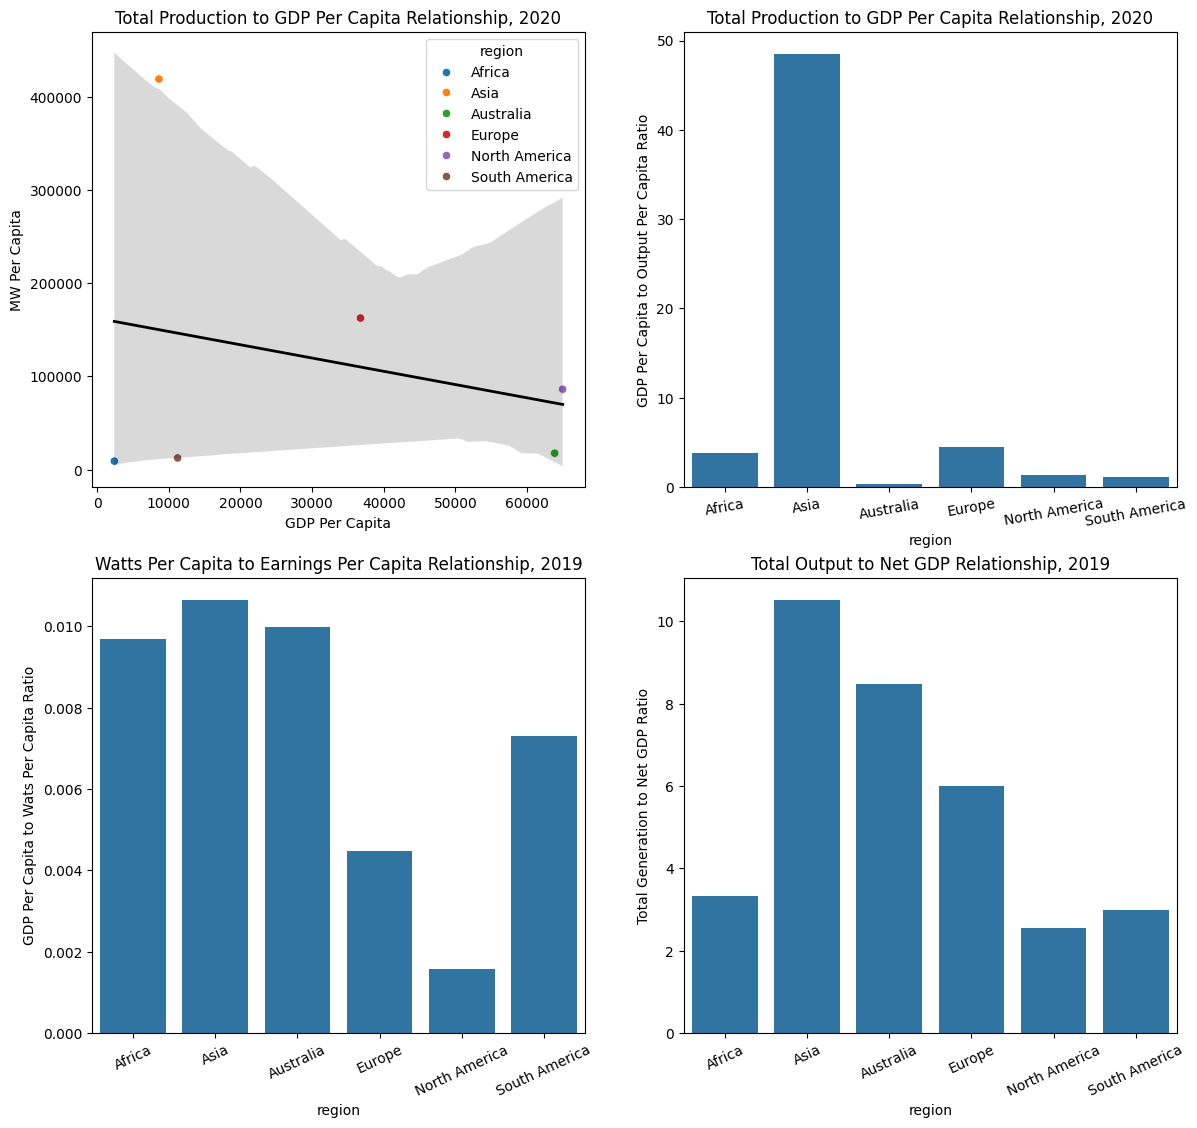

In [12]:
# Graphs

plt.figure(figsize=(14, 13))

ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(
    x='gdp_per_capita',
    y='_2020_total',
    hue='region',
    data=total_consumption_and_2020_total
)
sns.regplot(
    x='gdp_per_capita',
    y='_2020_total',
    data=total_consumption_and_2020_total,
    scatter=False,
    color='black',
    line_kws={'linewidth': 2}
)
plt.ylabel('MW Per Capita')
plt.xlabel('GDP Per Capita')
plt.title('Total Production to GDP Per Capita Relationship, 2020')

ax2 = plt.subplot(2, 2, 2)
sns.barplot(
    x='region',
    y='gdp_per_capita_total_generation_ratio',
    data=total_consumption_and_2020_total
)
plt.xticks(rotation=10)
plt.ylabel('GDP Per Capita to Output Per Capita Ratio')
plt.title('Total Production to GDP Per Capita Relationship, 2020')

ax3 = plt.subplot(2, 2, 3)
sns.barplot(
    x='region',
    y='gdp_w_per_capita_ratio',
    data=total_consumption_and_2020_total
)
plt.xticks(rotation=25)
plt.ylabel('GDP Per Capita to Wats Per Capita Ratio')
plt.title('Watts Per Capita to Earnings Per Capita Relationship, 2019')

ax4 = plt.subplot(2, 2, 4)
sns.barplot(
    x='region',
    y='gdp_net_total_generation_ratio',
    data=total_consumption_and_2020_total
)
plt.xticks(rotation=25)
plt.ylabel('Total Generation to Net GDP Ratio')
plt.title('Total Output to Net GDP Relationship, 2019')

# Showing a large chunk of countries that have the highest output per capita, to contrast with the graphs.
display(solar_aggregated_df.sort_values(by='w_per_capita_2019', ascending=False).head(20))


plt.show();

The relationship between GDP and solar generation is fascinating. Countries around the world take very different paths in how they produce solar energy, regardless of their economic standing. For instance, China has a high total GDP but low GDP per capita, and it leads the world in total solar production — yet its per capita solar generation is relatively low. Europe presents the inverse: higher GDP per capita and relatively higher per capita solar production, but far less total output. Let’s look at each graph to better understand these relationships.

GDP Findings:
Graph 1: This scatterplot shows an inverse relationship between GDP per capita and total solar production, with lower-income regions (like Asia, led by China) producing more solar power. However, this trend is skewed by China’s scale, making it less accurate when generalized across continents like Europe or North America. This shows that GDP alone is not a good determinator of solar growth globally, but it can paint an interesting picture when comparing individual continents and countries.
Graph 2: This bar graph confirms the inverse relationship shown in Graph 1: as GDP per capita increases, total solar output tends to decrease. It reinforces that solar generation is not solely dependent on wealth.
- Graph 3: Instead of total production compared with per capita gdp, this graph shows us production per capita findings. Understandably, this levels the playing field considerably; now regions that have low per capita gdps, like Africa, have a higher ratio. This essentially shows a level of efficiency. Where even though regions in Africa and Asia have low gdps per capita, they output a level of solar that is higher than Europeans and North Americans relative to their income. 
- Graph 4: This ratio shows us the correlation between total solar production and net gdp. These findings are more predictable than the other graphs, but equally as insightful. Asia has a high gdp and high solar output, ranking it at the top. However, North America, known for its high gdp but low solar output, is predictably at the bottom. This clearly shows which countries are using their economic power towards solar power the most efficiently, and is my choice for the graph that best illustrates this principle.


## Takeaways

Before I move on to transforming my DataFrames for visualizing it in Tableau, I'll summarize some of the insights I've made throughout exploring this dataset. Let's go back to the questions that I started with at the beggining of this project, and give them some answers:
- What has been the general trend of solar generation been from 2016 - 2020?
    - The graphs show us that the trend in solar production globally has been growing each year. China started this trend in 2017, and even though it has experienced some ups and downs, other regions, particularly Europe, has been helping to keep the pace of global solar accelaration. As other regions begin to make their own accelarated growth, China is no longer on track to hold more than 50% of total production in a few years.   
- What countries are leading the way in solar generation, and how do their trends compare to the rest of the world?
    - Although Asian countries, especially China, lead the way in new solar growth, there are very interesting trends in Europe and South America. The pace of expansion is greatest in South American countries, and Europe is generating the most solar power behind Asia as a total metric.
- How do different regions compare to each other in solar growth? How correlated is growth within a region?
    - Trends are very correlated within regions. South America and West Asian countries experience very correlated growth, as do European countries. While generation in the latter two is more volitile, Europe has been experiencing very steady growth over the last four years.
- How do other factors, such as GDP play into trends of solar growth?
    - GDP is a very comlicated factor when attempted to be aggregated across the globe. It turns out that countries that felt very efficient, such as European countries, are not as efficient as I thought, if measured by per capita income. However when it comes to total generation compared to total gdp, it turns out that high income is a generally positive factor in regards to solar production, although the United States and North America stand out as an exception.

## Transformations 

Now that I've answered most of my questions regarding global trends, I will make a csv that holds as many of the columns of data that I have created that I can, without creating unruly duplicates or unwanted data. In order to make this table suitable for Tableau visualizations, I would like to be able to make time-series analysis, to track trends over time. This requires melting the mostly horizontal nature of my dataset, where the totals are calculated per year in the same column. I will need a dataset that contains the column 'year', and has the related values in seperate columns.

In [ ]:
# The last graph is great, so is the table that it comes from. so lets save it as a csv and move to the transformations

gdp_regional_averages_df = total_consumption_and_2020_total[1:].copy()

gdp_regional_averages_df = gdp_regional_averages_df.drop(columns=['_2020_total'])

display(gdp_regional_averages_df.head(6))


,region,percentage_share_consumption,avg_w_per_capita_2019,avg_2019_new,gdp_per_capita,gdp_net,gdp_per_capita_total_generation_ratio,gdp_w_per_capita_ratio,gdp_net_total_generation_ratio
1,Africa,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052
2,Asia,4.223913,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510
3,Australia,10.700000,637.000000,862.000000,63842.0,2097.0,0.278328,0.009978,8.473534
4,Europe,4.533871,164.709677,850.096774,36751.0,27096.0,4.426220,0.004482,6.003395
5,North America,5.050000,101.750000,1803.666667,64961.0,34007.0,1.328736,0.001566,2.538183
6,South America,5.400000,82.000000,577.571429,11242.0,4225.0,1.126490,0.007294,2.997396


In [14]:
# Keeping straight all the DataFrames I have made thus far:

# display(time_series_melt_country.head(3))
# display(time_series_melt_region.head(5))
# display(time_series_melt_region_new.head(50))
# display(china_total_generation_melted.head(5))
# display(solar_aggregated_df.head(20))
# display(gdp_regional_averages_df.head(5))

time_series_melt_region_new = time_series_melt_region_new
time_series_melt_region_new = time_series_melt_region_new.drop(columns=['total'])
time_series_melt_region_new = time_series_melt_region_new


In [15]:
# Dropping the underscore for Tableau:

def fix_year(columns_value):
    parts = columns_value.split('_')
    return int(parts[1])

time_series_melt_region_new['year'] = time_series_melt_region_new['year'].apply(fix_year)
display(time_series_melt_region_new.head(3))

,region,year,growth_rate
0,Africa,2017,NaN
1,Asia,2017,171.801402
2,Australia,2017,-0.982869


In [16]:
# Working towards making one big DataFrame, melting and merging other DataFrames:

# Identify total and new columns dynamically
total_columns = [col for col in solar_aggregated_df.columns if '_total' in col]
new_columns = [col for col in solar_aggregated_df.columns if '_new' in col]

# Melt the 'total' values
melt_total = pd.melt(
    solar_aggregated_df,
    id_vars=['country', 'region', 'w_per_capita_2019', 'share_of_total_consumption'],
    value_vars=total_columns,
    var_name='year',
    value_name='total'
)

# Melt the 'new' values
melt_new = pd.melt(
    solar_aggregated_df,
    id_vars=['country', 'region', 'w_per_capita_2019', 'share_of_total_consumption'],
    value_vars=new_columns,
    var_name='year',
    value_name='new'
)

# Extract the numeric year from both DataFrames
melt_total['year'] = melt_total['year'].str.extract(r'_(\d{4})_')
melt_new['year'] = melt_new['year'].str.extract(r'_(\d{4})_')

# Merge total and new DataFrames on all shared columns (including year)
melted_df_merg1 = pd.merge(melt_total, melt_new, on=['country', 'region', 'w_per_capita_2019', 'share_of_total_consumption', 'year'], how='left')

melted_df_merge2 = pd.merge(melted_df_merg1, gdp_regional_averages_df, on=['region'], how='outer')

melted_df_merge2['year'] = melted_df_merge2['year'].astype(int)
time_series_melt_region_new['year'] = time_series_melt_region_new['year'].astype(int)


final_merge = pd.merge(
    melted_df_merge2,
    time_series_melt_region_new,
    on=['region', 'year'],
    how='left'
)


In [17]:

final_merge.to_csv('solar_by_year.csv', index=False)

final_merge_inspection_filter = final_merge.sort_values(by='year', ascending=False) # Change sort values to inspect DF. All values correct.

display(final_merge.head(60))
final_merge_inspection_filter.head(60)

,country,region,w_per_capita_2019,share_of_total_consumption,year,total,new,percentage_share_consumption,avg_w_per_capita_2019,avg_2019_new,gdp_per_capita,gdp_net,gdp_per_capita_total_generation_ratio,gdp_w_per_capita_ratio,gdp_net_total_generation_ratio,growth_rate
0,South Africa,Africa,44.000000,2.00,2016,1450.0,NaN,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
1,Egypt,Africa,17.000000,1.65,2016,48.0,NaN,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
2,Morocco,Africa,6.000000,1.30,2016,202.0,NaN,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
3,Algeria,Africa,10.000000,1.65,2016,219.0,NaN,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
4,Senegal,Africa,8.000000,1.65,2016,43.0,NaN,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
5,Namibia,Africa,55.000000,1.65,2016,36.0,NaN,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
6,Kenya,Africa,23.333333,1.65,2016,32.0,NaN,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
7,South Africa,Africa,44.000000,2.00,2017,1800.0,13.0,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
8,Egypt,Africa,17.000000,1.65,2017,169.0,121.0,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN
9,Morocco,Africa,6.000000,1.30,2017,204.0,2.0,1.650000,23.333333,504.571429,2409.0,2781.0,3.848900,0.009686,3.334052,NaN


,country,region,w_per_capita_2019,share_of_total_consumption,year,total,new,percentage_share_consumption,avg_w_per_capita_2019,avg_2019_new,gdp_per_capita,gdp_net,gdp_per_capita_total_generation_ratio,gdp_w_per_capita_ratio,gdp_net_total_generation_ratio,growth_rate
399,European Union,NaN,295.0,6.00,2020,152917.0,18788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Pakistan,Asia,6.0,4.25,2020,737.0,24.0,4.223913,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510,21.026897
314,Croatia,Europe,17.0,4.05,2020,85.0,16.0,4.533871,164.709677,850.096774,36751.0,27096.0,4.426220,0.004482,6.003395,14.285963
159,New Zealand,Australia,NaN,NaN,2020,142.0,25.0,10.700000,637.000000,862.000000,63842.0,2097.0,0.278328,0.009978,8.473534,-0.977840
158,Australia,Australia,637.0,10.70,2020,17627.0,1699.0,10.700000,637.000000,862.000000,63842.0,2097.0,0.278328,0.009978,8.473534,-0.977840
149,Oman,Asia,60.0,4.25,2020,109.0,100.0,4.223913,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510,21.026897
148,Indonesia,Asia,60.0,4.25,2020,172.0,17.0,4.223913,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510,21.026897
147,Cambodia,Asia,60.0,4.25,2020,208.0,109.0,4.223913,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510,21.026897
146,Iraq,Asia,60.0,4.25,2020,216.0,0.0,4.223913,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510,21.026897
145,Yemen,Asia,60.0,4.25,2020,253.0,3.0,4.223913,92.000000,3382.565217,8632.0,39781.0,48.534986,0.010658,10.531510,21.026897
